## Lab 07b-08b Basic PyTorch

### cscie89 Deep Learning, Fall 2020

Based on <b>"Deep Learning with PyTorch"</b> by Eli Stevens, Luca Antiga & Thomas Viehmann, Manning 2020

In [1]:
import torch
print(torch.__version__)

1.5.1+cu101


Pytorch API calls its basic data containers `tensors`. Tensors are glorified one, two or multi dimensional matrices.
- Scalar is a single number or tensor of rank 0.
- Vector is an array of numbers or tensor of rank 1
- Matrix is a 2-D array of numbers or tensor of rank 2
- In general, tensors are N-dimensional arrays of numbers.

### Creating Tensors

In [2]:
# The following creates a randomly initialized matrix of dimensions 5 (rows) and 3 (columns).
x = torch.rand(5,3)
print(x)

tensor([[0.2290, 0.0525, 0.2623],
        [0.8145, 0.8233, 0.1758],
        [0.5213, 0.1838, 0.9694],
        [0.0802, 0.5110, 0.4171],
        [0.7250, 0.8732, 0.1875]])


In [3]:
# We can create tensors filled with 0 (zeors) and 1 (ones)
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [4]:
x = torch.ones(5, 3, dtype=torch.long)
print(x)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]])


In [5]:
# We could construct a tensor directly from data by passign Numpy lists or arrays to tensor()
x = torch.tensor([5.5, 3])
print(x)
print(type(x))
x.type()

tensor([5.5000, 3.0000])
<class 'torch.Tensor'>


'torch.FloatTensor'

In [6]:
# Pytorch tensors have methods that create new tensors based on an existing tensor. 
# Those methods will reuse properties of the input tensor, e.g. dtype, 
# unless new values are provided by user. So, if we define a tensor of ones with type torch.double
xn = x.new_ones(5,3)  
# new_*() methods could change sizes and type. 
print(x)
print(xn)


tensor([5.5000, 3.0000])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [7]:
x = torch.tensor([5.5,3],dtype=int)

In [8]:
print(x)

tensor([5, 3])


In [9]:
x = x.new_ones(4,3)
print(xn)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [10]:
x = x.new_zeros(5,2)

In [11]:
print(x)

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])


`new_xxx()` methods could preserve the type of tensor on which they are applied

In [12]:
# Mathods *_like() will take a tensor x and create, in its image, 
# another tensor, possibly with modified types.
xr = torch.randn_like(x, dtype=float)    # with dtype override, xn was of type int.
print(xr)

tensor([[ 0.0969, -1.4430],
        [-1.8874, -0.7227],
        [ 0.1290, -1.1605],
        [-0.3962, -0.3278],
        [ 0.3240, -0.9168]], dtype=torch.float64)


In [13]:
# method size() tells you the size of the tensor
print(xr.size())    

torch.Size([5, 2])


In [14]:
# torch.Size is a tuple. It supports all tuple operations.
a = xr.size()
print(a[0], a[1])

5 2


### Operations on Torch Tensors

Pytorch supports all mathematical operations, usually in two ways: using mathematical short-hands and using named operators. For example, you could add two tensors using “+” operator:


In [15]:
y = torch.rand(5, 2)
print(xr)
print(y)
print(y + xr)

tensor([[ 0.0969, -1.4430],
        [-1.8874, -0.7227],
        [ 0.1290, -1.1605],
        [-0.3962, -0.3278],
        [ 0.3240, -0.9168]], dtype=torch.float64)
tensor([[0.1322, 0.8832],
        [0.0398, 0.9758],
        [0.8682, 0.1926],
        [0.3606, 0.9369],
        [0.8357, 0.2456]])
tensor([[ 0.2290, -0.5599],
        [-1.8476,  0.2531],
        [ 0.9972, -0.9679],
        [-0.0355,  0.6091],
        [ 1.1597, -0.6712]], dtype=torch.float64)


In [16]:
# Addition could also be performed using function `add()`
print(torch.add(xr, y))

tensor([[ 0.2290, -0.5599],
        [-1.8476,  0.2531],
        [ 0.9972, -0.9679],
        [-0.0355,  0.6091],
        [ 1.1597, -0.6712]], dtype=torch.float64)


Similarly, multiplication can be presented with `*` and `torch.mul()` function. Division with `/` and `torch.div()`. Negation with `–` or `.neg()`


## Main Modules of PyTorch

### Module `autograd`

In [2]:
# PyTorch uses automatic differentiation. A recorder records all the performed operations 
# and then plays them back to compute the gradients. 
# This technique finds extensive use with backpropagation operations in neural networks 
from torch.autograd import Variable
x = torch.tensor(0.4,dtype=float, requires_grad=True)
y = x**2

y.backward(create_graph=True)
x.grad

tensor(0.8000, dtype=torch.float64, grad_fn=<CloneBackward>)

### Module `nn`

It is difficult to define complex neural networks using numpy and raw autograd. 
Module `nn` helps by allowing us to build neural networks as a set of layers, 
This is quite similar to how it is done in Keras.

In [3]:
input_num_units = 10
hidden_num_units = 2
output_num_units = 1
import torch
# define model
model = torch.nn.Sequential(
    torch.nn.Linear(input_num_units, hidden_num_units),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_num_units, output_num_units)
)
loss_fn = torch.nn.CrossEntropyLoss()

### Module `optim`

The `torch.optim` module implements optimization algorithms for neural networks. It supports most of the commonly used optimization methods. This eliminates the need to build optimizers from scratch.


In [19]:
# Here is how we would declare `Adam` optimizer:
learning_rate = 1e-6
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

### Artificial Neuron in Pytorch

An artificial neuron takes an arbitrary number of inputs organized in tensor 𝑥, applies an affine transformation 𝑊𝑥+𝑏, where 𝑊 is a matrix of weights and 𝑏 is the bias factor, and passes the result to an activation function 𝑓, which produces a single output 𝑦=𝑓(𝑊𝑥+𝑏). 
In Pytorch, an artificial neuron could be implemented as the following class

In [20]:
from torch import nn
class Perceptron(nn.Module):
    "A perceptron is one linear layer"  
    def __init__(self, input_dim):
        "Args: input_dim (int): size of the input features"
        super(Perceptron, self).__init__()
        self.fc1 = nn.Linear(input_dim, 1)

    def forward(self, x_in):
        """The forward pass of the perceptron
        Args:
            x_in (torch.Tensor): an input data tensor
                x_in.shape should be (batch, num_features)
        Returns:
            the resulting tensor. tensor.shape should be (batch,)   """
        return torch.sigmoid(self.fc1(x_in)).squeeze()


Pytorch `class Linear`, of `torch.nn` module, does the needed affine transformation. 
Function `torch.sigmoid()` provides the non-linearity.


### Activation Functions, `sigmoid(x)`

Activation functions introduce non-linearities essential for capturing complex relationships. PyTorch has several built-in activation functions:

Sigmoid function saturates (i.e., produces extreme valued outputs) very quickly for values left and right from -4 and +4 respectively. 
This can become a problem because it can lead to the gradients becoming either zero or diverging to an overflowing floating-point value. These phenomena are also known as vanishing gradient problem and exploding gradient problem, respectively. 
As a consequence, it is rare to see sigmoid units used in neural networks other than at the output, where the squashing property allows one to interpret outputs as probabilities.


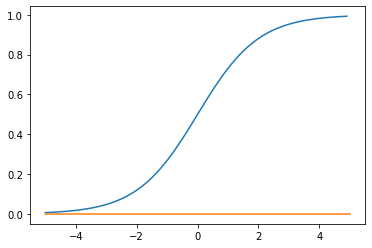

In [21]:
import torch
import numpy as np
import matplotlib.pyplot as plt
x = torch.arange(-5., 5., 0.1)
y = torch.sigmoid(x)
plt.plot(x.numpy(), y.detach().numpy())
plt.plot(np.linspace(-5,5,100),np.zeros(100))
plt.show()


### Activation Functions, `tanh()`

`tanh()` is simply a linear transform of the sigmoid function.  Notice that `tanh()`, like the sigmoid, is also a “squashing” function, except that it maps the set of real values from (–∞, +∞) to the range [-1, +1].


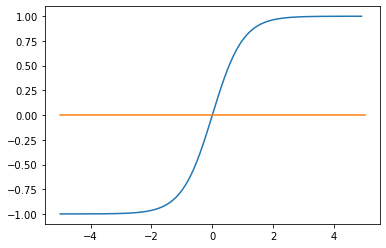

In [22]:
import torch
import numpy as np
import matplotlib.pyplot as plt

x = torch.arange(-5., 5., 0.1)
y = torch.tanh(x)

plt.plot(x.numpy(), y.detach().numpy())
plt.plot(np.linspace(-5,5,100), np.zeros(100))
plt.show()



### Activation Function, `ReLU`

`ReLU` (pronounced ray-luh) stands for rectified linear unit. This is arguably the most important of the activation functions. One say that many of the recent innovations in deep learning would have been impossible without the use of `ReLU`. 
For something so fundamental, it’s also surprisingly new as far as neural network activation functions go. And it’s surprisingly simple in form:
`𝑓(𝑥)=max⁡(0,𝑥)`
All a `ReLU` unit is doing is clipping the negative values to zero


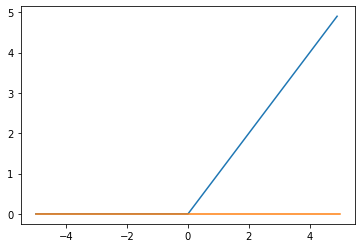

In [23]:
import torch
import matplotlib.pyplot as plt
relu = torch.nn.ReLU()
x = torch.arange(-5., 5., 0.1)
y = relu(x)
plt.plot(x.numpy(), y.detach().numpy())
plt.plot(np.linspace(-5,5,100), np.zeros(100))
plt.show()


### Activation Function, Leaky `ReLU`

The clipping effect of `ReLU` can become an issue, where over time certain outputs in the network can simply become zero and never revive again. This is called the “dying ReLU” problem.
To mitigate that effect, variants such as the Leaky ReLU and `Parametric ReLU` (`PReLU`) activation functions have proposed, where the leak coefficient a is a learned parameter. Functional form of Leaky ReLU is

`𝑓(𝑥)=max⁡(𝑥,𝑎𝑥)`


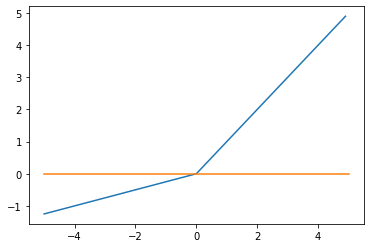

In [24]:
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
prelu = nn.PReLU(num_parameters=1)
x = torch.arange(-5., 5., 0.1)
y = prelu(x)
plt.plot(x.numpy(), y.detach().numpy())
plt.plot(np.linspace(-5,5,100), np.zeros(100))
plt.show()

Softmax function could be treated as an activation function. It is a multidimensional implementation of the sigmoid function. 
s𝑜𝑓𝑡𝑚𝑎𝑥() could have multiple (𝑁) outputs of the form:
𝑠𝑜𝑓𝑡𝑚𝑎𝑥(𝑥_𝑖) = 𝑒^(𝑥_𝑖  )/(∑_(𝑗=1)^𝑁▒𝑒^(𝑥_𝑗  ) )
𝑠𝑜𝑓𝑡𝑚𝑎𝑥(𝑥_𝑖) can be interpreted as probabilities, since ∑_(𝑖=1)^𝑁▒〖𝑠𝑜𝑓𝑡𝑚𝑎𝑥(𝑥_𝑖)〗 = 1
Module torch.nn contains softmax() function:


### Sotfmax

In [25]:
import torch
import torch.nn as nn
softmax = nn.Softmax(dim=1)
x_input = torch.randn(1, 3)
y_output = softmax(x_input)
print(x_input)
print(y_output)
print(torch.sum(y_output, dim=1))

tensor([[ 0.9156, -0.2369, -0.5853]])
tensor([[0.6499, 0.2053, 0.1449]])
tensor([1.0000])


### Mean Square Loss Function

For regression problems for which the network’s output (ŷ) and the target (y) are continuous values, one common loss function is the mean squared error (MSE).
The MSE is simply the average of the squares of the difference between the predicted and target values. There are several other loss functions that you can use for regression problems, such as mean absolute error (MAE) and root mean squared error (RMSE). They all involve computing a real-valued distance between the output and target. 
Code below demonstrates an implementation of MSE loss using PyTorch.


In [26]:
import torch
import torch.nn as nn

mse_loss = nn.MSELoss()
prediction = torch.randn(3, 5, requires_grad=True)
targets = torch.randn(3, 5)
loss = mse_loss(prediction, targets)
print(loss)


tensor(3.2734, grad_fn=<MseLossBackward>)


### Categorical Cross-Entropy Loss

The categorical cross-entropy loss is typically used in a multiclass classification setting in which the outputs are interpreted as predictions of class membership probabilities. The target (`y`) is a vector of `n` elements that represents the true multinomial distribution over all the classes. If only one class is correct, this vector is a one-hot vector. The network’s output (`ŷ`) is also a vector of `n` elements but represents the network’s prediction of the multinomial distribution. Categorical cross entropy will compare these two vectors `(y,ŷ)` to measure the loss

In [27]:
import torch
import torch.nn as nn
ce_loss = nn.CrossEntropyLoss()
outputs = torch.randn(3, 5, requires_grad=True)
targets = torch.tensor([1, 0, 3], dtype=torch.int64)
loss = ce_loss(outputs, targets)
print(loss)

tensor(3.5453, grad_fn=<NllLossBackward>)


A vector of random values is first used to simulate network output. Then, the ground truth vector, called targets, is created as a vector of integers because PyTorch’s implementation of `CrossEntropyLoss()` assumes that each input has one particular class, and each class has a unique index. 
Targets has three elements: an index representing the correct class for each input. From this assumption, it performs the computationally more efficient operation of indexing into the model output


### Binary Cross Entropy

Sometimes, our task involves discriminating between two classes—also known as binary classification. For such situations, it is efficient to use the binary cross-entropy (BCE) loss. Such loss function is typically used in Sentiment analysis.
In example below we create a binary probability output vector, probabilities, using the sigmoid activation function on a random vector that represents the output of the network. Next, the ground truth is instantiated as a vector of 0’s and 1’s.8 Finally, we compute binary cross-entropy loss using the binary probability vector and the ground truth vector.


In [28]:
bce_loss = nn.BCELoss()
sigmoid = nn.Sigmoid()
probabilities = sigmoid(torch.randn(4, 1, requires_grad=True))
targets = torch.tensor([1, 0, 1, 0],  dtype=torch.float32).view(4, 1)
loss = bce_loss(probabilities, targets)
print(probabilities)
print(loss)


tensor([[0.8076],
        [0.9110],
        [0.3882],
        [0.5288]], grad_fn=<SigmoidBackward>)
tensor(1.0830, grad_fn=<BinaryCrossEntropyBackward>)


### Tensors and Storage

Values are allocated in contiguous chunks of memory, managed by torch.Storage instances. A storage is a one-dimensional array of numerical data, i.e. a contiguous block of memory containing numbers of a given type, such a float or int32. 
A PyTorch Tensor is a view over such storage that is capable of indexing into that storage using an offset and per-dimension strides.

In [29]:
points = torch.tensor([[1.0, 4.0], [2.0, 1.0], [3.0, 5.0]])
print(points)
points.storage()

tensor([[1., 4.],
        [2., 1.],
        [3., 5.]])


 1.0
 4.0
 2.0
 1.0
 3.0
 5.0
[torch.FloatStorage of size 6]

Even though the tensor reports itself as having 3 rows and 2 columns, the storage under the hood is a contiguous array of size 6. 
In this sense, the tensor just knows how to translate a pair of indices into a location in the storage


### Changing the value of Storage

We can also index into a storage manually, for instance:

In [30]:
points_storage = points.storage()
points_storage[0]

1.0

In [31]:
# We can query and change elements of the storage
points.storage()[1]

4.0

In [32]:
# You can change the value of storage and the value of tensor will change accordingly:
points = torch.tensor([[1.0, 4.0], [2.0, 1.0], [3.0, 5.0]])
points_storage = points.storage()
points_storage[0] = 2.0
points

tensor([[2., 4.],
        [2., 1.],
        [3., 5.]])

### Size, offset, stride

To index into a storage, tensors rely on a few pieces of information, which, together with their storage, unequivocally define them: size, storage offset and stride. 
The size (or shape, in NumPy parlance) is a tuple indicating how many elements across each dimension the tensor represents. 
The storage offset is the index in the storage corresponding to the first element in the tensor. 
The stride is the number of elements in the storage that need to be skipped over to obtain the next element along each dimension.

This indirection between Tensor and Storage leads some operations, like transposing a tensor or extracting a sub-tensor, to be inexpensive, as they do not lead to memory reallocations; instead they consist in allocating a new tensor object with a different value for size, storage offset or stride.


### Numeric Types

The argument `dtype` to tensor constructors `Tensor()` specifies the numerical "data type" that will be contained in the tensor. The argument is deliberately similar to the standard NumPy argument of the same name. Below is the list of the possible values for the `dtype` argument:


<br>`torch.float32` or `torch.float`: 32-bit floating point
<br>`torch.float64` or `torch.double`: 64-bit, double precision floating point
<br>`torch.float16` or `torch.half`: 16-bit, half precision floating point
<br>`torch.int8`: signed 8-bit integers
<br>`torch.uint8`: unsigned 8-bit integers `torch.int16` or `torch.short`: signed 16-bit integers
<br>`torch.int32` or `torch.int`: signed 32-bit integers
<br>`torch.int64` or `torch.long`: signed 64-bit integers

Each of `torch.float`, `torch.double`, etc. have a corresponding concrete class of `torch.FloatTensor`, `torch.DoubleTensor`, etc. 

The class for `torch.int8` is `torch.CharTensor` and for `torch.uint8` is `torch.ByteTensor`. `torch.Tensor` is an alias for `torch.FloatTensor`; 32-bit floating point is the default data type.


We can specify the proper `dtype` as an argument to the constructor

In [33]:
double_points = torch.ones(10, 2, dtype=torch.double)
short_points = torch.tensor([[1, 2], [3, 4]], dtype=torch.short)
print(double_points)
print(short_points)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]], dtype=torch.float64)
tensor([[1, 2],
        [3, 4]], dtype=torch.int16)


### Tensor Type, Casting

In [34]:
#We can find out the dtype of the elements of a tensor by accessing the corresponding attribute
short_points.dtype

torch.int16

In [35]:
# We can also cast the output of a tensor creation function to the right type using the corresponding casting method, such as:
double_points = torch.zeros(10, 2).double()
short_points = torch.ones(10,2).short()
print(double_points)
print(short_points)

tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]], dtype=torch.float64)
tensor([[1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1]], dtype=torch.int16)


In [36]:
points = double_points

In [37]:
# or use more convenient to() method
double_points = torch.zeros(10, 2).to(torch.double)
short_points = torch.ones(10, 2).to(dtype=torch.short)
# We can always cast a tensor of one type into a tensor of another type using the type method:
points = torch.randn(10, 2)
shortpoints = points.type(torch.short)

In [38]:
print(points)
print(shortpoints)

tensor([[ 2.4674, -1.2832],
        [ 0.5625,  0.9032],
        [-0.5504,  0.0790],
        [-0.6670,  1.0629],
        [-0.0782, -1.2594],
        [-0.5042, -0.2950],
        [-1.3874,  0.9526],
        [-1.1877, -0.1170],
        [ 1.4512,  0.0628],
        [ 0.2732,  0.6709]])
tensor([[ 2, -1],
        [ 0,  0],
        [ 0,  0],
        [ 0,  1],
        [ 0, -1],
        [ 0,  0],
        [-1,  0],
        [-1,  0],
        [ 1,  0],
        [ 0,  0]], dtype=torch.int16)


### Indexing Tensors

We saw that `points[0]` returns a tensor containing the 2D point at the first row of the tensor. 
If we need to obtain a tensor containing all points but the first, we use range indexing notation, the same that applies to standard Python lists:

In [39]:
some_list = list(range(6))
print(some_list[:])
print(some_list[1:4])
print(some_list[1:])
print(some_list[:4])
print(some_list[:-1])
print(some_list[1:4:2])


[0, 1, 2, 3, 4, 5]
[1, 2, 3]
[1, 2, 3, 4, 5]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
[1, 3]


Just like in NumPy and in other Python scientific libraries, we can use range indexing for each of the dimensions of the tensor:

In [40]:
print(points[1:])
print(points[1:, :])
print(points[1:, 0])

tensor([[ 0.5625,  0.9032],
        [-0.5504,  0.0790],
        [-0.6670,  1.0629],
        [-0.0782, -1.2594],
        [-0.5042, -0.2950],
        [-1.3874,  0.9526],
        [-1.1877, -0.1170],
        [ 1.4512,  0.0628],
        [ 0.2732,  0.6709]])
tensor([[ 0.5625,  0.9032],
        [-0.5504,  0.0790],
        [-0.6670,  1.0629],
        [-0.0782, -1.2594],
        [-0.5042, -0.2950],
        [-1.3874,  0.9526],
        [-1.1877, -0.1170],
        [ 1.4512,  0.0628],
        [ 0.2732,  0.6709]])
tensor([ 0.5625, -0.5504, -0.6670, -0.0782, -0.5042, -1.3874, -1.1877,  1.4512,
         0.2732])


### Serializing tensors

Data inside many tensors might need to be saved to a file and loaded it back at some point. For example, we don’t want to have to retrain a model from scratch every time we start running our program! 
PyTorch uses pickle under the hood to serialize the tensor object, plus dedicated serialization code for the storage. Here’s how we can save our `points` tensor to a `ourpoints.t` file in directory `data`:

In [41]:
torch.save(points, 'data/points.t')

In [42]:
# We can pass a file descriptor in lieu of the filename
with open('data/points2.t','wb') as f:
    torch.save(points, f)

In [43]:
# We load tensor points back into the memory using method `load`:
points2 = torch.load('data/points2.t')

# Or, by using the file pointer, with:
#with open('data/ourpoints.t','rb') as f:
#    points = torch.load(f)
print(points2)

tensor([[ 2.4674, -1.2832],
        [ 0.5625,  0.9032],
        [-0.5504,  0.0790],
        [-0.6670,  1.0629],
        [-0.0782, -1.2594],
        [-0.5042, -0.2950],
        [-1.3874,  0.9526],
        [-1.1877, -0.1170],
        [ 1.4512,  0.0628],
        [ 0.2732,  0.6709]])


Tensor saved in the above way cannot be read with software other than PyTorch.

### HDF5

To save tensors in a format that other APIs can use we need hdf5. This format stores serialized multidimensional arrays, organized in a nested key-value dictionary. HDF5 accepts and returns data in the form of NumPy arrays.

We can save our points tensor by converting it to a NumPy array and passing it to the `create_dataset` function:

In [44]:
import h5py
f = h5py.File('data/ourpoints.hdf5', 'w')
dset = f.create_dataset('coords', data=points.numpy())
f.close()

Here 'coords' is a key into the HDF5 file. We can have other keys, even nested ones. With HDF5 we can index the dataset while on disk and only access the elements we’re interested in. Let’s suppose we want to load just the last two points in our dataset:

In [45]:
f = h5py.File('data/ourpoints.hdf5', 'r')
dset = f['coords']
last_points = dset[1:]
print(last_points)

[[ 0.56248677  0.90324223]
 [-0.55038923  0.07898833]
 [-0.66703796  1.0628562 ]
 [-0.07819628 -1.2593712 ]
 [-0.50424415 -0.2949796 ]
 [-1.3874422   0.95259726]
 [-1.1876625  -0.11697351]
 [ 1.4511536   0.06277319]
 [ 0.27323264  0.67090553]]


Data has not been loaded when the file was opened or the dataset was required. Rather, data stayed on disk until we requested the second and last rows in the dataset. At that point, h5py has accessed those two columns and returned a NumPy array-like object encapsulating that region in that dataset that behaves like a NumPy array and has the same API.
We can pass the returned object to the `torch.from_numpy` function to obtain a tensor directly. Note that in this case the data is copied over to the tensor’s storage.

In [46]:
last_points = torch.from_numpy(dset[1:])
f.close()
print(last_points)

tensor([[ 0.5625,  0.9032],
        [-0.5504,  0.0790],
        [-0.6670,  1.0629],
        [-0.0782, -1.2594],
        [-0.5042, -0.2950],
        [-1.3874,  0.9526],
        [-1.1877, -0.1170],
        [ 1.4512,  0.0628],
        [ 0.2732,  0.6709]])


### Moving Tensors to GPU

Every Torch tensor can be transferred to (one of) the GPU(s) in order to perform massively parallel, fast computations. All operations that will be performed on the tensor will be carried out using GPU-specific routines that come with PyTorch.
As of early 2019, main PyTorch releases only have acceleration on GPUs that have support for Nvidia’s CUDA. 
Proof of concept versions of PyTorch running on AMD’s ROCm 31 platform exit, but full support has not been merged into PyTorch as of version 1.0. 
Support for Google’s TPUs is supposedly there. The current proof of concept available to the public in Google Colab
Implementation of data structures and kernels on other GPU technology, such as OpenCL, are not planned yet.


In addition to the dtype, a PyTorch Tensor also has a notion of device, which is where on the computer the tensor data is being placed. Here is how we can create a tensor on the GPU by specifying the corresponding argument to the constructor:

In [47]:
points_gpu = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]], device='cuda:0')

We could also copy a tensor created on the CPU onto the GPU using the `to()` method:

In [48]:
points2 = points
points2_gpu = points2.to(device='cuda:0')

Doing so returns a new tensor that has the same numerical data, but stored in the RAM of the GPU, rather than in regular system RAM. Now that the data is stored locally on the GPU, we'll start to see the speedups mentioned earlier when performing mathematical operations on the tensor. 

The class of this new GPU-backed tensor is also changed to be `torch.cuda.FloatTensor` (given our starting type of `torch.FloatTensor`; the corresponding set of torch.cuda.DoubleTensor etc. all exist). In almost all cases, CPU- and GPU-based tensors expose the same user-facing API, making easy to write device agnostic code.

In case our machine has more than one GPU, we can also decide on which GPU we allocate the tensor by passing a zero-based integer identifying the GPU on the machine, such as: `points_gpu = points.to(device='cuda:0')`

From this point, any operation performed on the tensor is carried out on the GPU


### Procesing on GPU

In [49]:
# For example to perform multiplication by 2 of every element of tensor `points`, on GPU, we write:
points_gpu = 2 * points.to(device='cuda')

# Tensor `points_gpu` is calculated and stored on GPU. To get the content of that tensor to CPU, we have to move the tensor back to CPU, by doing:
points_cpu = points_gpu.to(device='cpu')

# We can also use the shorthand methods `cpu` and `cuda` instead of the `to()` method to achieve the same goal, like:
points_gpu = points.cuda()
points_gpu = points.cuda(0)
points_cpu = points_gpu.cpu()

### Simple Exercise

We will now implement our simple example with a set of random point making an elongeted cloud and then use linear regression to find the line that fits that cloud the best. We are experimentally finding a formula that transforms variable `t_f` into variable `t_c`.


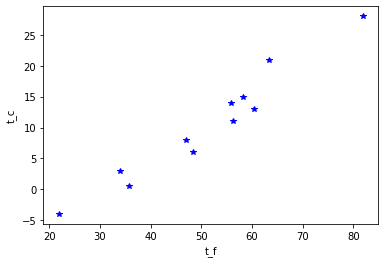

In [24]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import torch
torch.set_printoptions(edgeitems=2)
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_f = [35.7, 55.9, 58.2, 81.9, 56.3, 46.9, 33.9, 21.8, 48.4, 60.4, 63.4]

t_c = torch.tensor(t_c)
t_f = torch.tensor(t_f)
plt.ylabel("t_c")
plt.xlabel("t_f")
plt.plot(t_f, t_c,"b*")
plt.show()

In [25]:
print(t_c)

tensor([ 0.5000, 14.0000, 15.0000, 28.0000, 11.0000,  8.0000,  3.0000, -4.0000,
         6.0000, 13.0000, 21.0000])


In [26]:
# The model is linear, a single line
def model(t_f, w, b):
    return w * t_f + b

#Loss function is mean square error. t_p stands for t_predicted
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()


Once we find the values of `w` and `b`, we have the model and, can predict temperature `t_p` in Celsius, for any new reading, `t_f`,  of temperature in Fahrenheit. 

We could for example, guess that `w` and `b` have values `1` and `0,` calculate any `t_p` and examine the value of the loss function.  For original `t_f`-s, and `(w,b) = (1,0)`, the results would be:


In [27]:
w = torch.ones(1)
b = torch.zeros(1)
t_p = model(t_f, w, b)
print(t_p)

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 46.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 63.4000])


In [28]:
# The loss function for those particular values of `(w,b)` would be:
loss = loss_fn(t_p, t_c)
print(loss)

tensor(1708.5574)


That random guess prediction is on average some 13 degree off, so we need a better method.


We know from our previous studies that in order to find the optimal values of `w` and `b`, we have to follow gradient descent method.

That means finding gradient of the loss function with respect to both parameters, `w` and `b`, and then moving opposite to the gradient by the step defined by the learning rate.

### Preparing for Gradient Descent

In order to compute the derivative of the loss function with respect to parameters `w` and `b`, we will apply the chain rule and compute the derivatives of the loss with respect to its input (which is the output of the model, i.e. `t_p`), times the derivatives of the model with respect to parameters `w` and `b`

Our model and the loss functions are rather simple so we can write functions representing derivatives rather easily. Loss is function of `t_p` and `t_p` depends in weight `w` and bias `b`. `t_c` is the original label and does not depend on those parameters. 


In [29]:
def loss_fn(t_p, t_c):
	squared_diffs = (t_p - t_c)**2
	return squared_diffs.mean()

We first need the derivative of the loss function with respect to `t_p`. 
The derivative of `loss_fn` with respect to `t_p` is function `dloss_fn`

In [30]:
def dloss_fn(t_p, t_c):
	dsq_diffs = 2 * (t_p - t_c)
	return dsq_diffs

In [31]:
# Model is defined as:
def model(t_f, w, b):
	return w * t_f + b

# Since t_p = model(w, b), the derivatives of t_p with respect to w and b are given by:
def dmodel_db(t_f, w, b):
	return 1.0

def dmodel_dw(t_f, w, b):
    return t_f

### Gradient

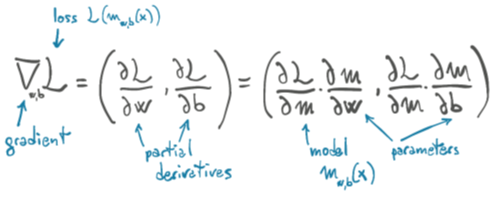

In [32]:
from IPython.display import Image
# The function returning the gradient of the loss with respect to w and b is:
def grad_fn(t_f, t_c, t_p, w, b):
	dloss_dw = dloss_fn(t_p, t_c) * dmodel_dw(t_f, w, b)
	dloss_db = dloss_fn(t_p, t_c) * dmodel_db(t_f, w, b)
	return torch.stack([dloss_dw.mean(), dloss_db.mean()])

# mathematically this is rather simple
Image("images/gradient.png")

In [33]:
def training_loop(n_epochs, learning_rate, params, t_f, t_c, print_params=True):
    for epoch in range(1, n_epochs + 1):
        w, b = params

        t_p = model(t_f, w, b)  #  Forward pass
        loss = loss_fn(t_p, t_c)
        gradient = grad_fn(t_f, t_c, t_p, w, b)  #  Backward pass

        params = params - learning_rate * gradient

        if epoch in {1, 2, 3, 10, 11, 99, 100, 1000, 2000, 5000, 10000, 20000}:  
            print('Epoch %d, Loss %f' % (epoch, float(loss))) #  Periodic logging
            if print_params:
                print('    Params:', params)
                print('    Grad:  ', gradient)
        if epoch in {4, 12, 101}:
            print('...')

        if not torch.isfinite(loss).all():
            break  # <3>
            
    return params

### Training

Gradient for the bias is 1 what is on average 50 times smaller than the gradient for the weights.
This means that a meaningful learning rate for one will be to large for the other and would cause instability. A standard way to deal with the issue is to normalize or standardize the input to make it approximately 
After some experimentation we discover that we must normalize our input data 

In [37]:

t_fn = 0.1 * t_f

# and provide initial values for `w` and `b` and only then train the model:
params = training_loop(
    n_epochs = 5000, 
    learning_rate = 1e-2, 
    params = torch.tensor([1.0, 0.0]), 
    t_f = t_fn, 
    t_c = t_c,
    print_params = True)

Epoch 1, Loss 81.791069
    Params: tensor([1.7696, 0.1077])
    Grad:   tensor([-76.9606, -10.7673])
Epoch 2, Loss 39.222095
    Params: tensor([2.0874, 0.1344])
    Grad:   tensor([-31.7839,  -2.6768])
Epoch 3, Loss 32.028770
    Params: tensor([2.2205, 0.1281])
    Grad:   tensor([-13.3075,   0.6291])
...
Epoch 10, Loss 29.992308
    Params: tensor([ 2.3452, -0.0591])
    Grad:   tensor([-0.5417,  2.8818])
Epoch 11, Loss 29.906395
    Params: tensor([ 2.3505, -0.0879])
    Grad:   tensor([-0.5264,  2.8796])
...
Epoch 99, Loss 23.364286
    Params: tensor([ 2.7728, -2.4446])
    Grad:   tensor([-0.4460,  2.4888])
Epoch 100, Loss 23.300409
    Params: tensor([ 2.7773, -2.4694])
    Grad:   tensor([-0.4452,  2.4847])
...
Epoch 1000, Loss 5.102747
    Params: tensor([  4.8524, -14.0495])
    Grad:   tensor([-0.0995,  0.5554])
Epoch 2000, Loss 4.179822
    Params: tensor([  5.3368, -16.7524])
    Grad:   tensor([-0.0188,  0.1051])
Epoch 5000, Loss 4.145535
    Params: tensor([  5.4491, -

In [38]:
# We need to see how are we doing. The model allow us to calculate predictions `t_p`.
# Tensor `params` contains results of our training process
print(params) 

tensor([  5.4491, -17.3791])


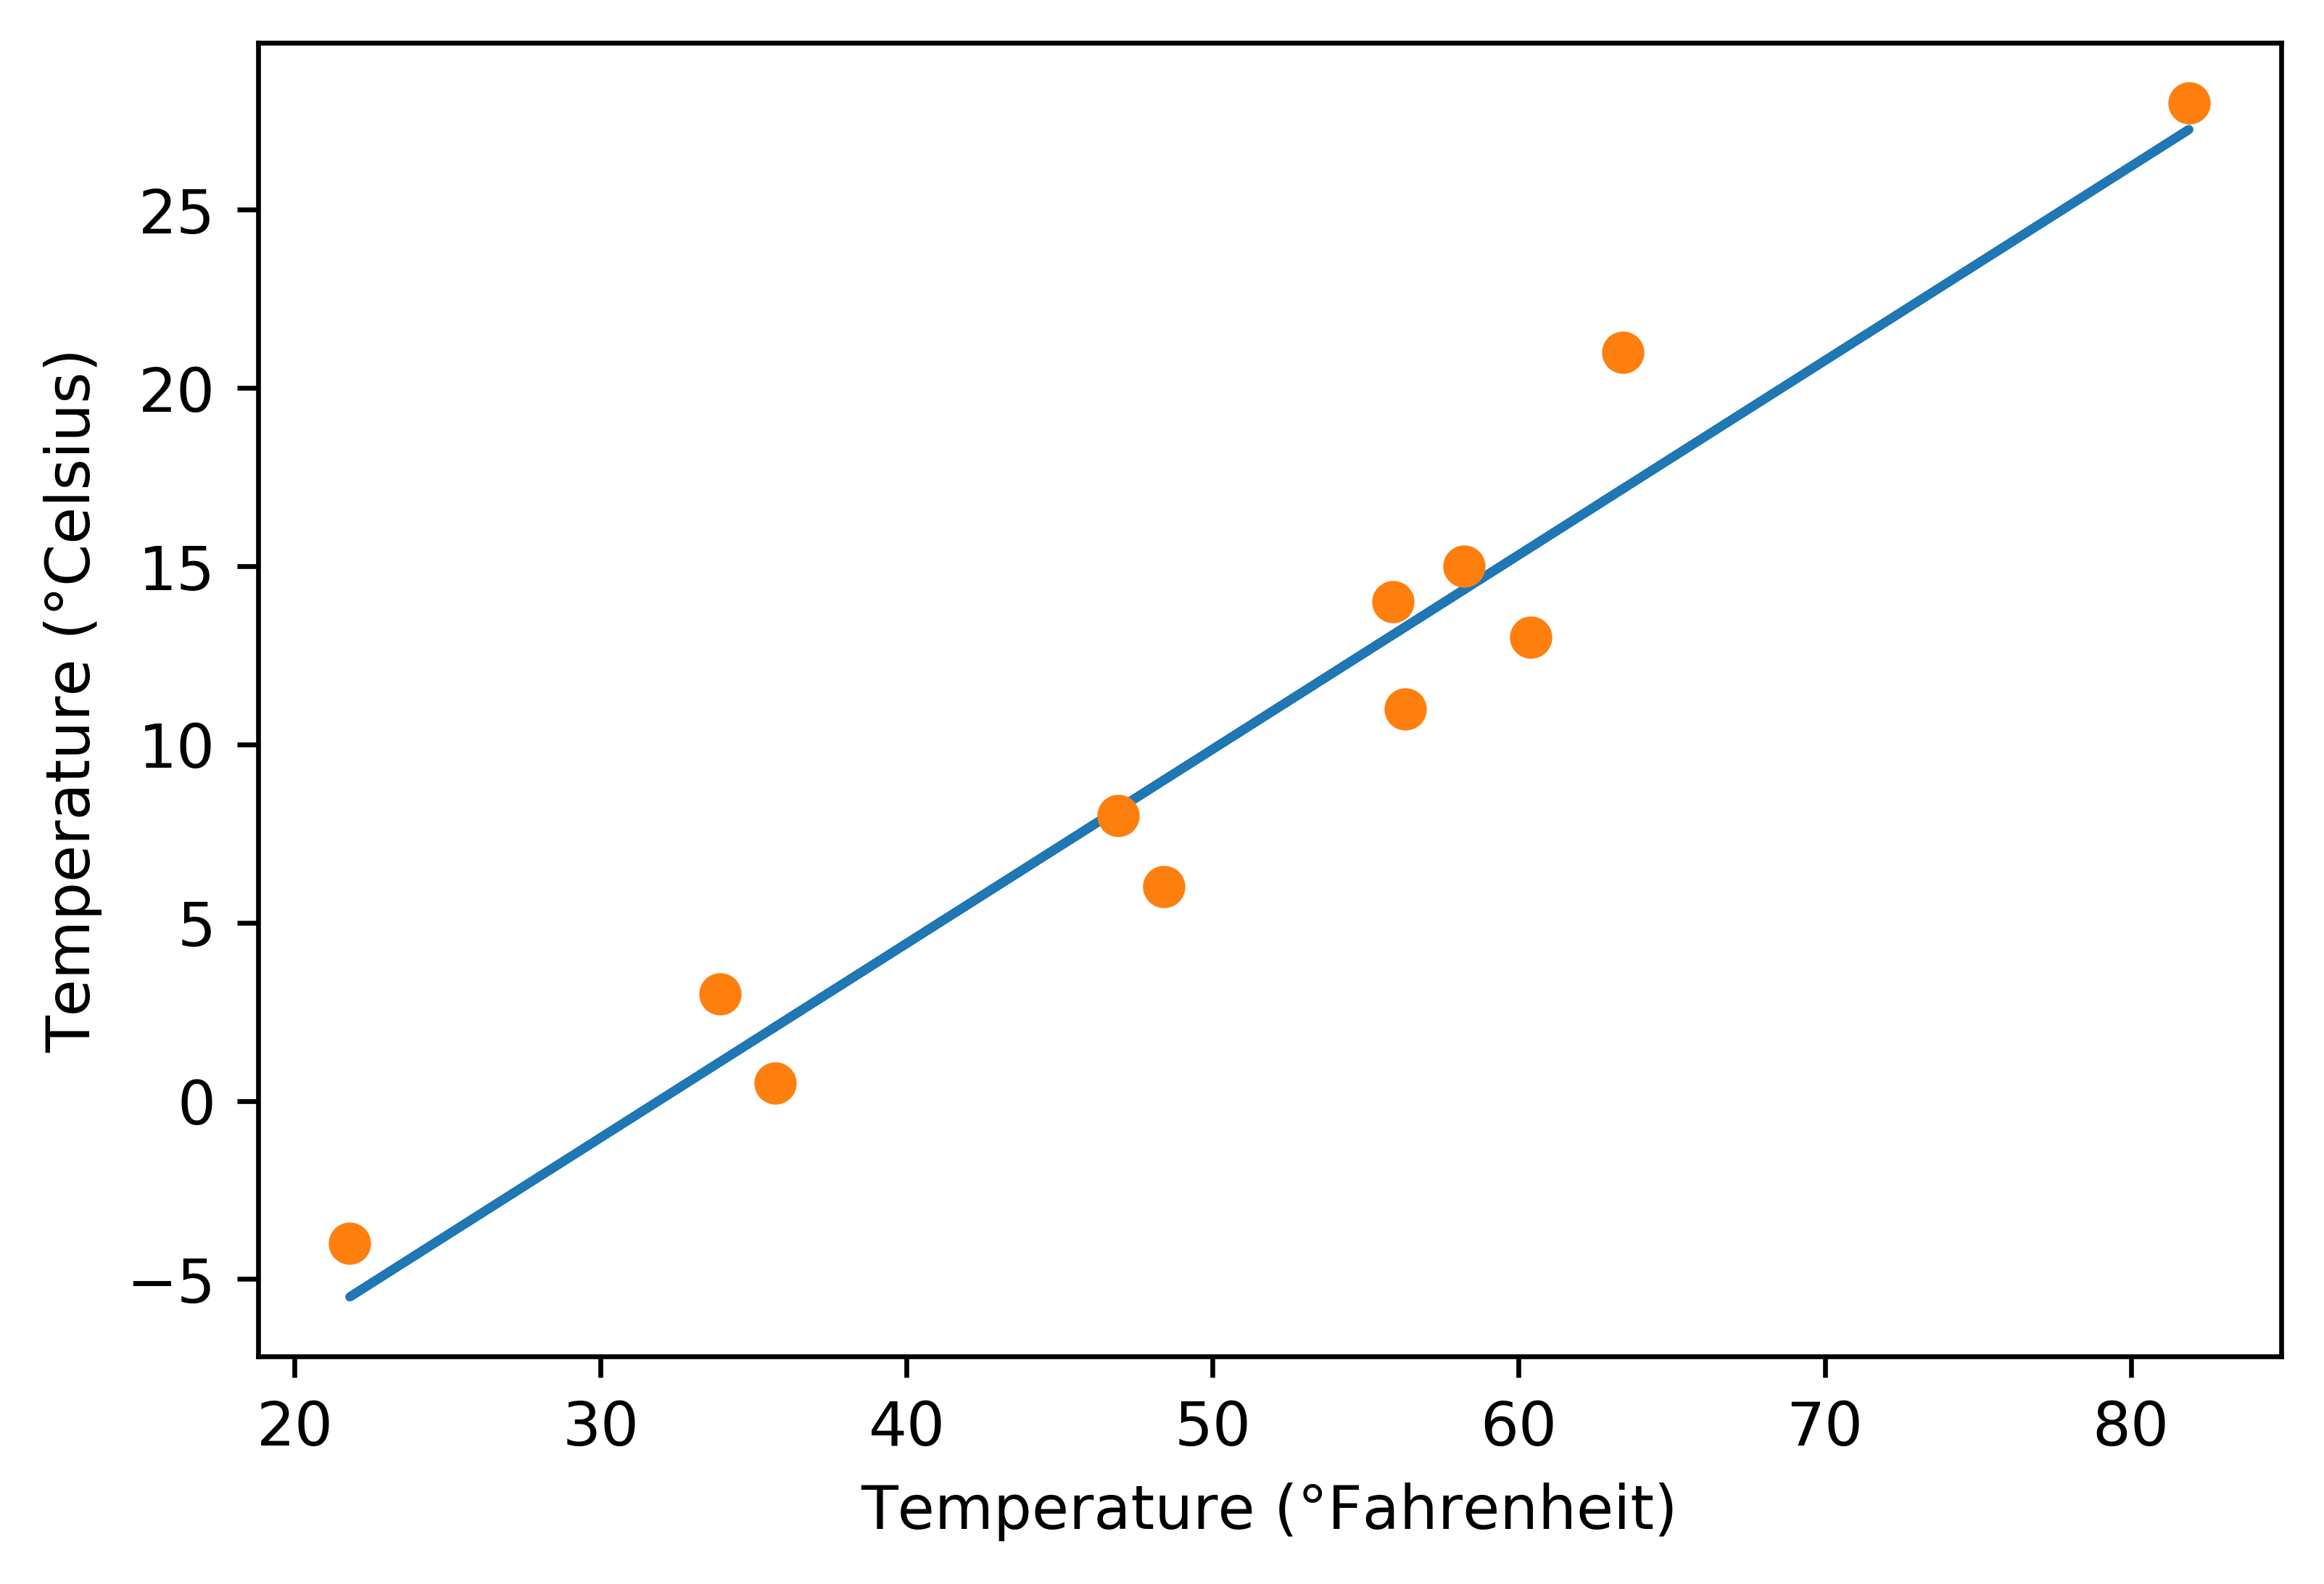

In [39]:
%matplotlib inline
from matplotlib import pyplot as plt

t_p = model(t_fn, *params) 
# Besides the original training data, we will plot prediction `t_p` for every input `t_f`
fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_f.numpy(), t_p.numpy())  #, t_p.detach().numpy()) 
plt.plot(t_f.numpy(), t_c.numpy(), 'o')
plt.savefig("temp_unknown_plot.png", format="png")  # bookskip

The above result is not that bed for a rather simple routine. We could avoid doing all the "manual" differentiation, though.

## Autograd

When dealing with a tiny problem we could calculate all the derivatives "manually" and use the chain rule to get the gradient.

When networks are of any realistic size that would be tedious. 

PyTorch tensors can remember where they come from, in terms of the operations and parent tensors from which they originated.  Tensors can automatically provide the chain of derivatives of those operations with respect to their inputs.
This means that we do not need to derive our model by hand ; given a forward expression, no matter how nested, PyTorch will  automatically provide the gradient of that expression with respect to its input parameters.
When initializing parameters and variables, we need to specify property `requires_grad=True`. For example:

`params = torch.tensor([1.0, 0.0], requires_grad=True)`


In [4]:
%matplotlib inline
import numpy as np
import torch
torch.set_printoptions(edgeitems=2)

In [5]:
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
t_f = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])
t_fn = 0.1 * t_f

In [6]:
def model(t_f, w, b):
    return w * t_f + b

In [7]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

To tell PyTorch to track the entire family tree of tensors resulting from operations on a particular tensor `params` we use argument `quires_grad=True`. If `params` is set with `requires_grad=True`, any tensor that has tensor `params` as an ancestor will have access to the chain of functions that were called to get from `params` to that tensor. In the case these functions are differentiable (and most PyTorch tensor operations are), the value of the derivatives, i.e gradients, will be automatically populated as a `grad` attribute of the `params` tensor.


In [8]:
params = torch.tensor([1.0, 0.0], requires_grad=True)   # Usually =True

In general, all PyTorch tensors have an attribute named `grad`. Normally, it has value `None`:

In [9]:
params.grad is None

True

To calculate gradients of tensor `loss` with respect to parameters tensor `params`, we need to start with the `params` tensor with `requires_grad` set to `True`. Then we call the `model` and compute the `loss`. 

Finally, we call method `backward()` on the `loss` tensor to send all intermediate values of gradients into `params.grad`.



In [10]:
loss = loss_fn(model(t_f, *params), t_c)
loss.backward()

params.grad

tensor([4517.2969,   82.6000])

At this point, the `grad` attribute of tensor `params` contains the derivatives of the `loss` with respect to each element of `params`.

Note: Passing `*params` as an argument to a function, `model(t_f, *params)` in our case, is called `argument unpacking` and is the same as passing individual elements of `params`, like:
`model(t_f, params[0], params[1])`

We could have any number of tensors with `requires_grad` set to `True` and any composition of functions. 
In such case, PyTorch would compute derivatives of the loss throughout the chain of functions (the computation graph) and accumulate their values in the `grad` attribute of those tensors (the leaf nodes of the graph).


Periodically, we need to reset those grad attributes to zero. That is done using method `zero_()`

In [9]:
if params.grad is not None:
    params.grad.zero_()

## Forward and back propagation, call to `backward()` 

When we compute our `loss` value parameters `w` and `b` are passed to the forward graph of the model. This is depicted in the top portion of the image bellow. When we invoke `backward()`, the autograd visits the computational graph in reverse and populates all the leaf notes with values of gradients with respect to all parameters.

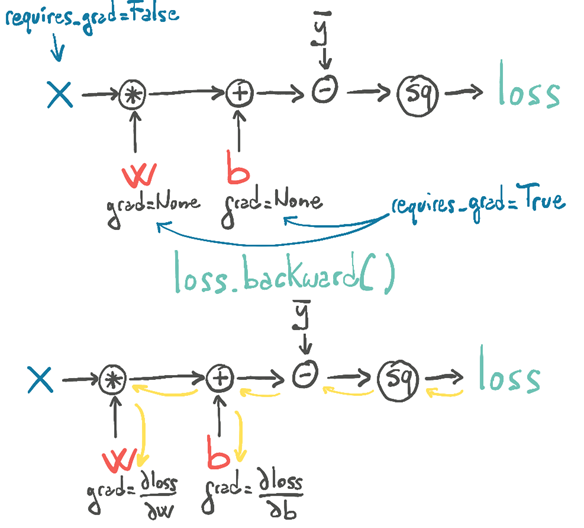

In [71]:
from IPython.display import Image
Image("images/forward_backward.png")

### Need to `zero_()` gradients

Whenever method `backward()` is called, the `loss` is evaluated and the value of current gradient is added to attribute `grad` of every leaf node. 
When `backward()` is called repeatedly (as in any training loop), the gradients at each leaf will be accumulated (i.e. summed) on top of the ones computed at the previous iteration. This will lead to incorrect values for the gradients.
In order to prevent this from occurring, we need to zero the gradient(s) explicitly at each iteration. We do it using the in-place `zero_()` method. A methods the name of which ends with an underscore is an `in-place`method.

In [10]:
# setting the gradient to zero is usually done in this feshion:
if params.grad is not None:
    params.grad.zero_()

### Training Loop

We will present two versions of the training loop

In [11]:
def training_loop(n_epochs, learning_rate, params, t_f, t_c):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:  # This could be done at any point in the loop
            params.grad.zero_()      # prior to calling `loss.backward()`
        
        t_p = model(t_f, *params) 
        loss = loss_fn(t_p, t_c)
        loss.backward()
        
        params = (params - learning_rate * params.grad).detach().requires_grad_()

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params

Line:
`params = (params - learning_rate * params.grad).detach().requires_grad_()`
requires explanation.

We updated tensor `params`, detached it from the computational graph using method `detach()`. This way `params` effectively looses the memory of the operations that generated it. Once calculation is done, we re-enablel tracking by calling `requires_grad_()`. Operations with training underscore are happining inplace. In this case it reactivates `autograd` for tensor `params`.

In the code below, there are two particularities. 

First, we are encapsulating the update in a `no_grad`
context using the Python `with` statement. This means that within that `with` scope, the PyTorch autograd
mechanism should look away, i.e. not add edges to the forward graph in the previous figure. In fact,
when we are executing this bit of code, the forward graph that PyTorch recorded has been
consumed when we called `backward()`, leaving us with the `params` leaf node. But now we want to
change this leaf node before we start out building a fresh forward graph on top of it.

Secondly, we update params in-place. This means that we keep the same tensor params around,
but subtract our update from it. When using `autograd`, we usually avoid in-place updates because
PyTorch’s `autograd` engine might need the values we would be modifying for the call to `backward()`.
Here, however, we are operating without `autograd`, and in fact it is beneficial to keep the `params`
tensor around. Not replacing the parameters by assigning new tensors to their variable name will
become crucial when we register our parameters with the optimizer

In [11]:
def training_loop(n_epochs, learning_rate, params, t_f, t_c):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:  
            params.grad.zero_()
        
        t_p = model(t_f, *params) 
        loss = loss_fn(t_p, t_c)
        loss.backward()
        
        with torch.no_grad(): 
            params -= learning_rate * params.grad

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params

Execute training loop.

In [12]:
params = training_loop(
    n_epochs = 5000, 
    learning_rate = 1e-2, 
    params = torch.tensor([1.0, 0.0], requires_grad=True), 
    t_f = t_fn,  
    t_c = t_c)

Epoch 500, Loss 7.860116
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957697
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927679
Epoch 4500, Loss 2.927652
Epoch 5000, Loss 2.927647


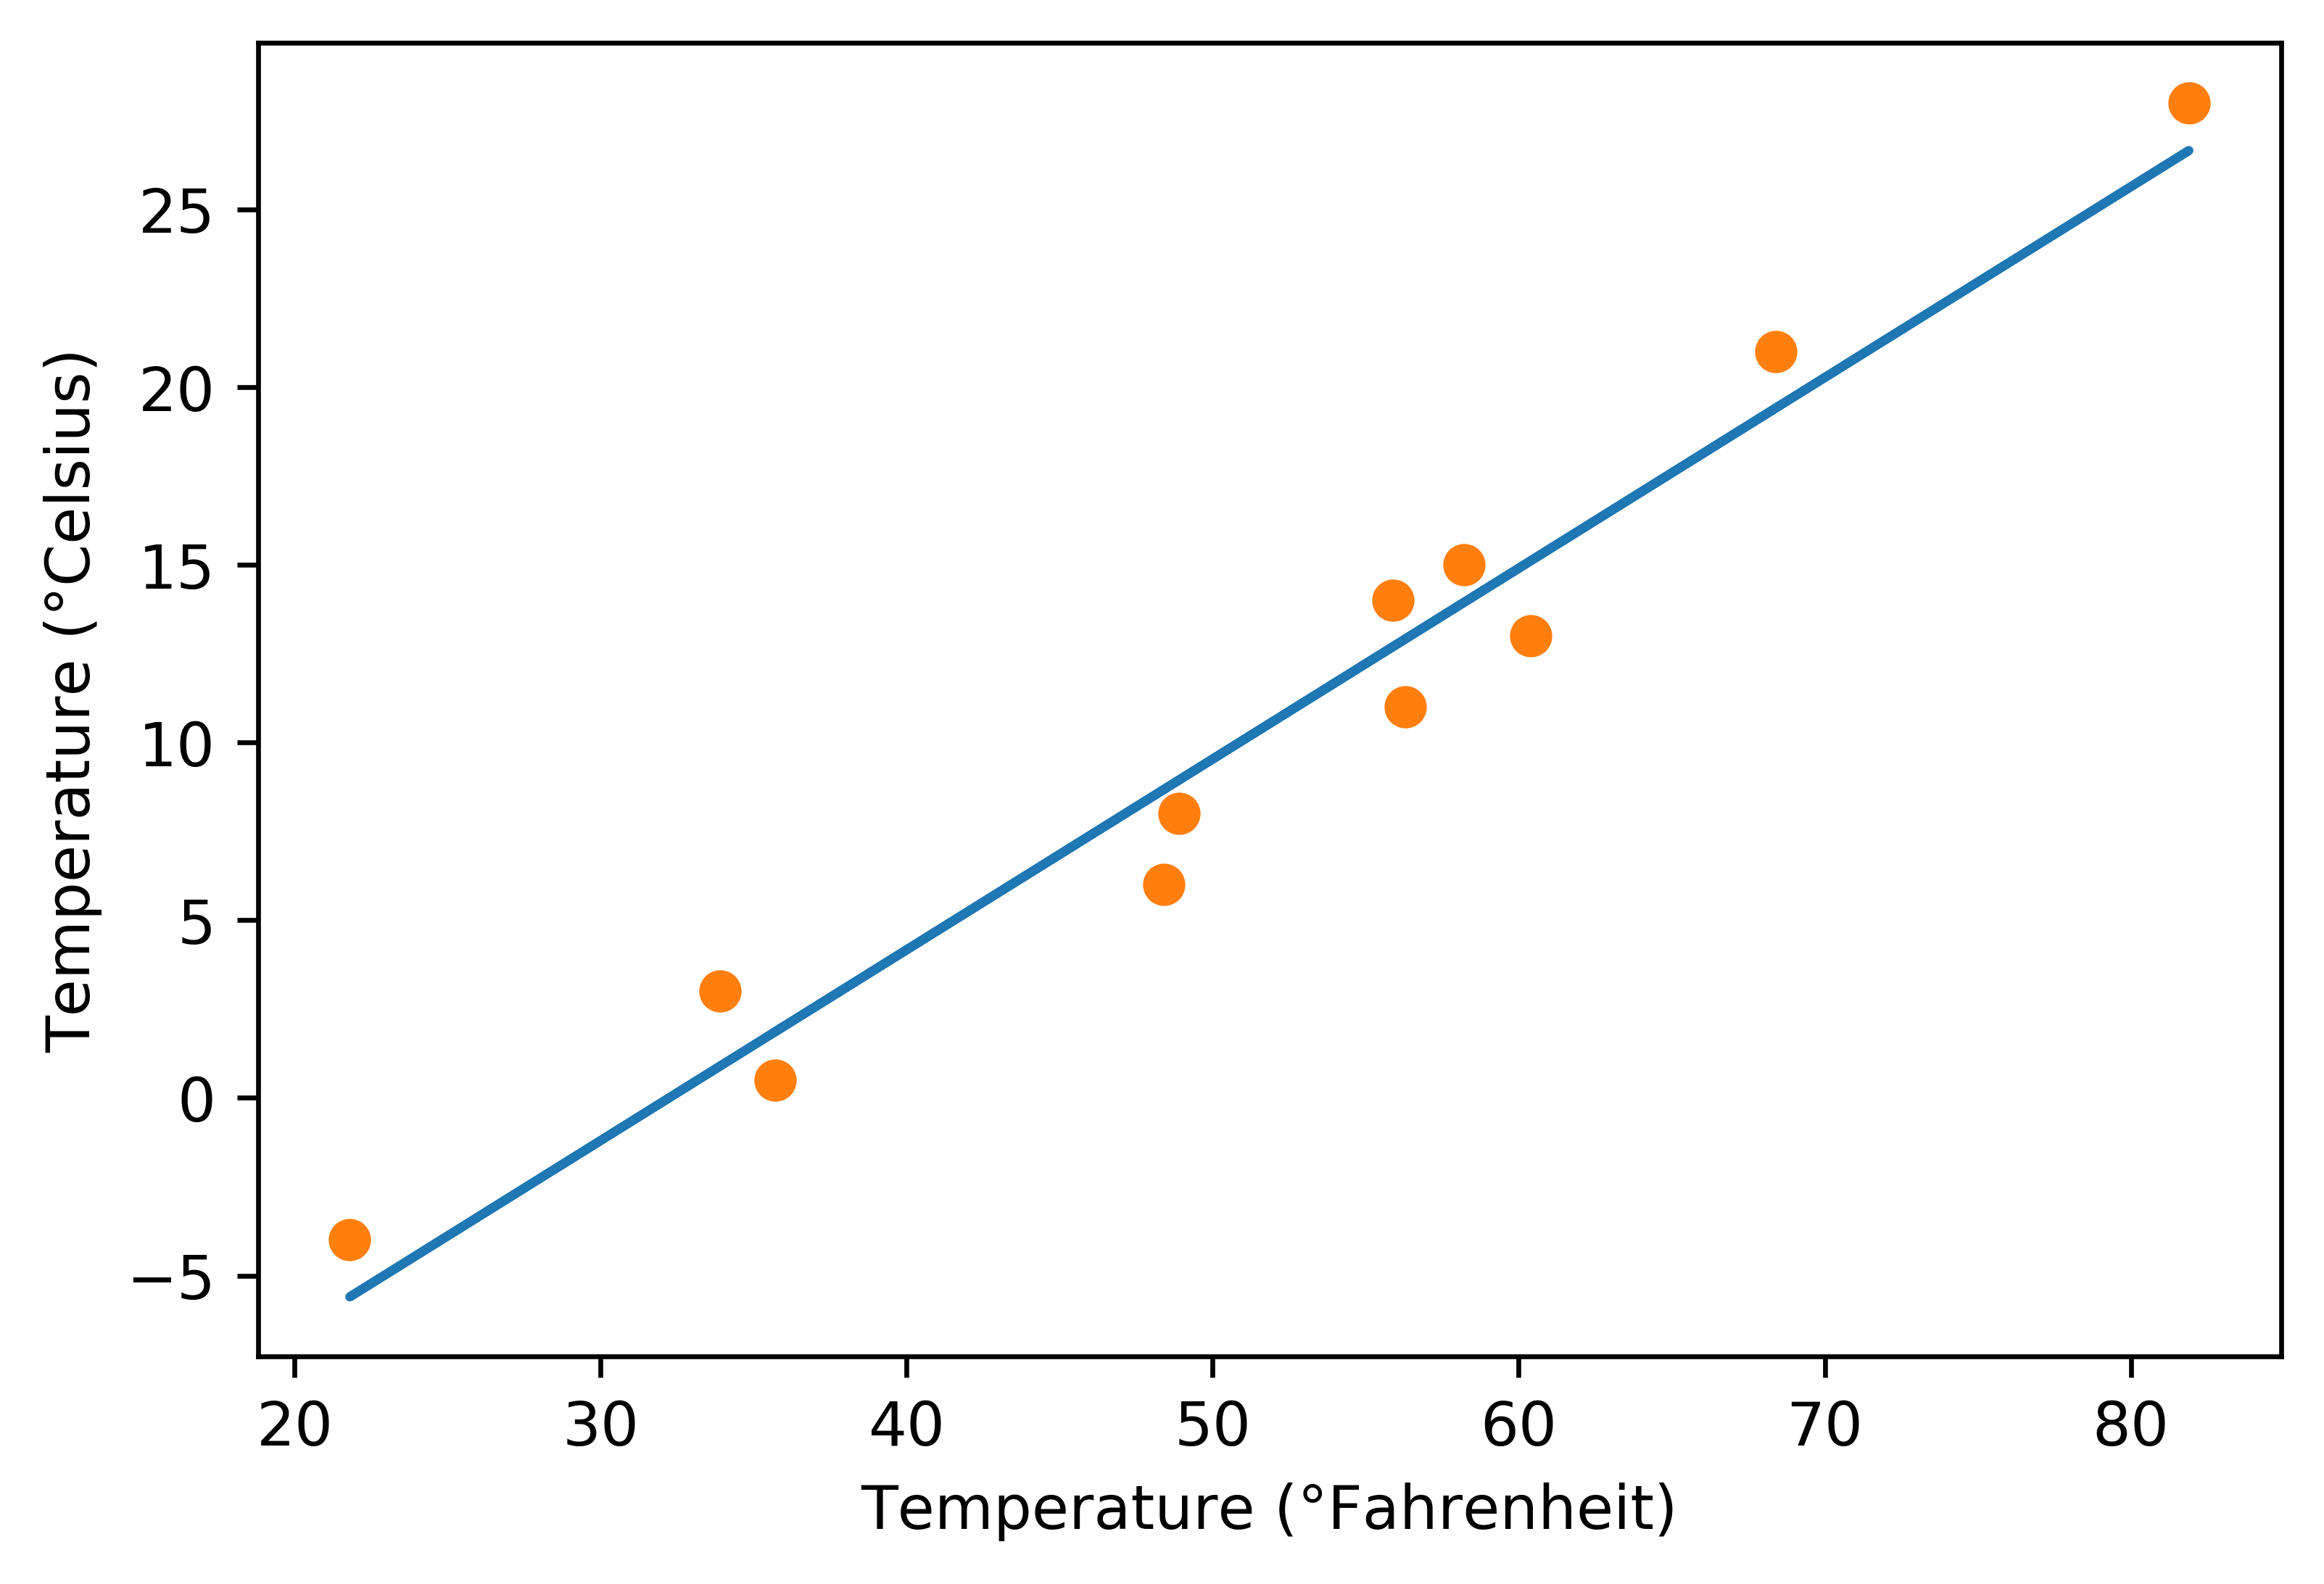

In [13]:
%matplotlib inline
from matplotlib import pyplot as plt

t_p = model(t_fn, *params)  
# Besides the original training data, we will plot prediction `t_p` for every input `t_f`
fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_f.numpy(), t_p.detach().numpy()) # cannot call numpy() directly, need detach()
plt.plot(t_f.numpy(), t_c.numpy(), 'o')
plt.savefig("temp_unknown_plot.png", format="png")  # bookskip

## Optimizers

PyTorch Optimizers are classes which abstracts the optimization strategy away from the user code, i.e. the training loop.
This saves us from having to update each and every parameter to our model ourselves. 

In what follows we will implement the same regression modeling as done above, this time using `torch.optim` optimizers

In [14]:
%matplotlib inline
import numpy as np
import torch
torch.set_printoptions(edgeitems=2)

In [15]:
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
t_f = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])
t_fn = 0.1 * t_f

In [16]:
def model(t_f, w, b):
    return w * t_f + b

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

### PyTorch module `torch.optim`

The torch module has an optim submodule with classes implementing different optimization algorithms. By rule those algorithms are implemented in an optimal fashion and are bug free.


In [17]:
import torch.optim as optim

dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'Optimizer',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'lr_scheduler']

### Optimizer methods and SGD

Each optimizer exposes two methods: `zero_grad` and `step`. 
- Method `zero_grad` zeroes the `grad` attribute of all the parameters passed to the optimizer upon construction. 
- Method `step` updates the value of those parameters according to the optimization strategy implemented by the specific optimizer.

The following code creates tensor `params` and instantiates a gradient descent optimizer:


In [18]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-5
optimizer = optim.SGD([params], lr=learning_rate)

Here SGD stands for Stochastic Gradient Descent. The optimizer itself is a vanilla Gradient Descent (provided the `momentum` argument is set to `0.0`, which is the default).


The terms stochastic comes from the fact that the gradient is typically obtained by averaging over a random subset of all input samples, called a minibatch. However, the optimizer itself does not know if the loss was evaluated on all the samples (vanilla) or a random subset thereof (stochastic), so the algorithm is literally the same in the two cases


### Run optimizer one step at a time

In [19]:
# We can run our optimizer one step at a time. For example
print(params)
t_p = model(t_f, *params)
loss = loss_fn(t_p, t_c)
loss.backward()

optimizer.step()  # step updates parameters

print(params)

tensor([1., 0.], requires_grad=True)
tensor([ 9.5483e-01, -8.2600e-04], requires_grad=True)


We forgot the zero-ing step.
Before we go into a loop we should zero the gradients, run the optimizer again

In [21]:
# Intialize everything again
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-5
optimizer = optim.SGD([params], lr=learning_rate)

t_p = model(t_f, *params)
loss = loss_fn(t_p, t_c)

optimizer.zero_grad() # <1>   this is needed before invoking backward()
loss.backward()
optimizer.step()

params

tensor([ 9.5483e-01, -8.2600e-04], requires_grad=True)

In [24]:
params = torch.tensor([ 9.5483e-01, -8.2600e-04], requires_grad=True)

t_p = model(t_f, *params)
loss = loss_fn(t_p, t_c)

optimizer.zero_grad() # <1>   this is needed before invoking backward()
loss.backward()
optimizer.step()

params

tensor([ 9.5483e-01, -8.2600e-04], requires_grad=True)

The value of params was updated upon calling `step()` without us having to touch `params` ourselves!

Optimizer looked into params.grad and updated `params` subtracting the `learning_rate` times `grad` from it, exactly as in our former hand-written code did.


### Training loop with an Optimizer

We are not ready to use this code in a training loop
We need to zero out the gradients, first. Had we called the above code in a loop, gradients would have accumulated in the leaves at every call to backward and our gradient descent would have oscillated wildly.

In [25]:
# Loop-ready code, needs an extra `zero_grad()` call right before the call to `backward()`
params = torch.tensor([1.7761, 0.1064], requires_grad=True)
learning_rate = 1e-5
optimizer = optim.SGD([params], lr=learning_rate)
t_p = model(t_fn, *params)
loss = loss_fn(t_p, t_c)
optimizer.zero_grad()
loss.backward()
optimizer.step()
params


tensor([1.7764, 0.1064], requires_grad=True)

The `optim` module abstracts away the specific optimization scheme. 

All we have to do is provide a list of parameters to selected optimizer (that list can be extremely long, as needed for very deep neural network models) and we can forget about the details.


#### The Training Loop with the Optimizer
The updated training loop now reads:

In [26]:
import torch.optim as optim

def training_loop(n_epochs, optimizer, params, t_f, t_c):
    for epoch in range(1, n_epochs + 1):
        t_p = model(t_f, *params) 
        loss = loss_fn(t_p, t_c)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params

In [27]:
#We set parameters and initialize the optimizer:

params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate) # <1>

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    params = params, # <1> 
    t_f = t_fn,
    t_c = t_c)

Epoch 500, Loss 7.860116
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957697
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927679
Epoch 4500, Loss 2.927652
Epoch 5000, Loss 2.927647


tensor([  5.3671, -17.3012], requires_grad=True)

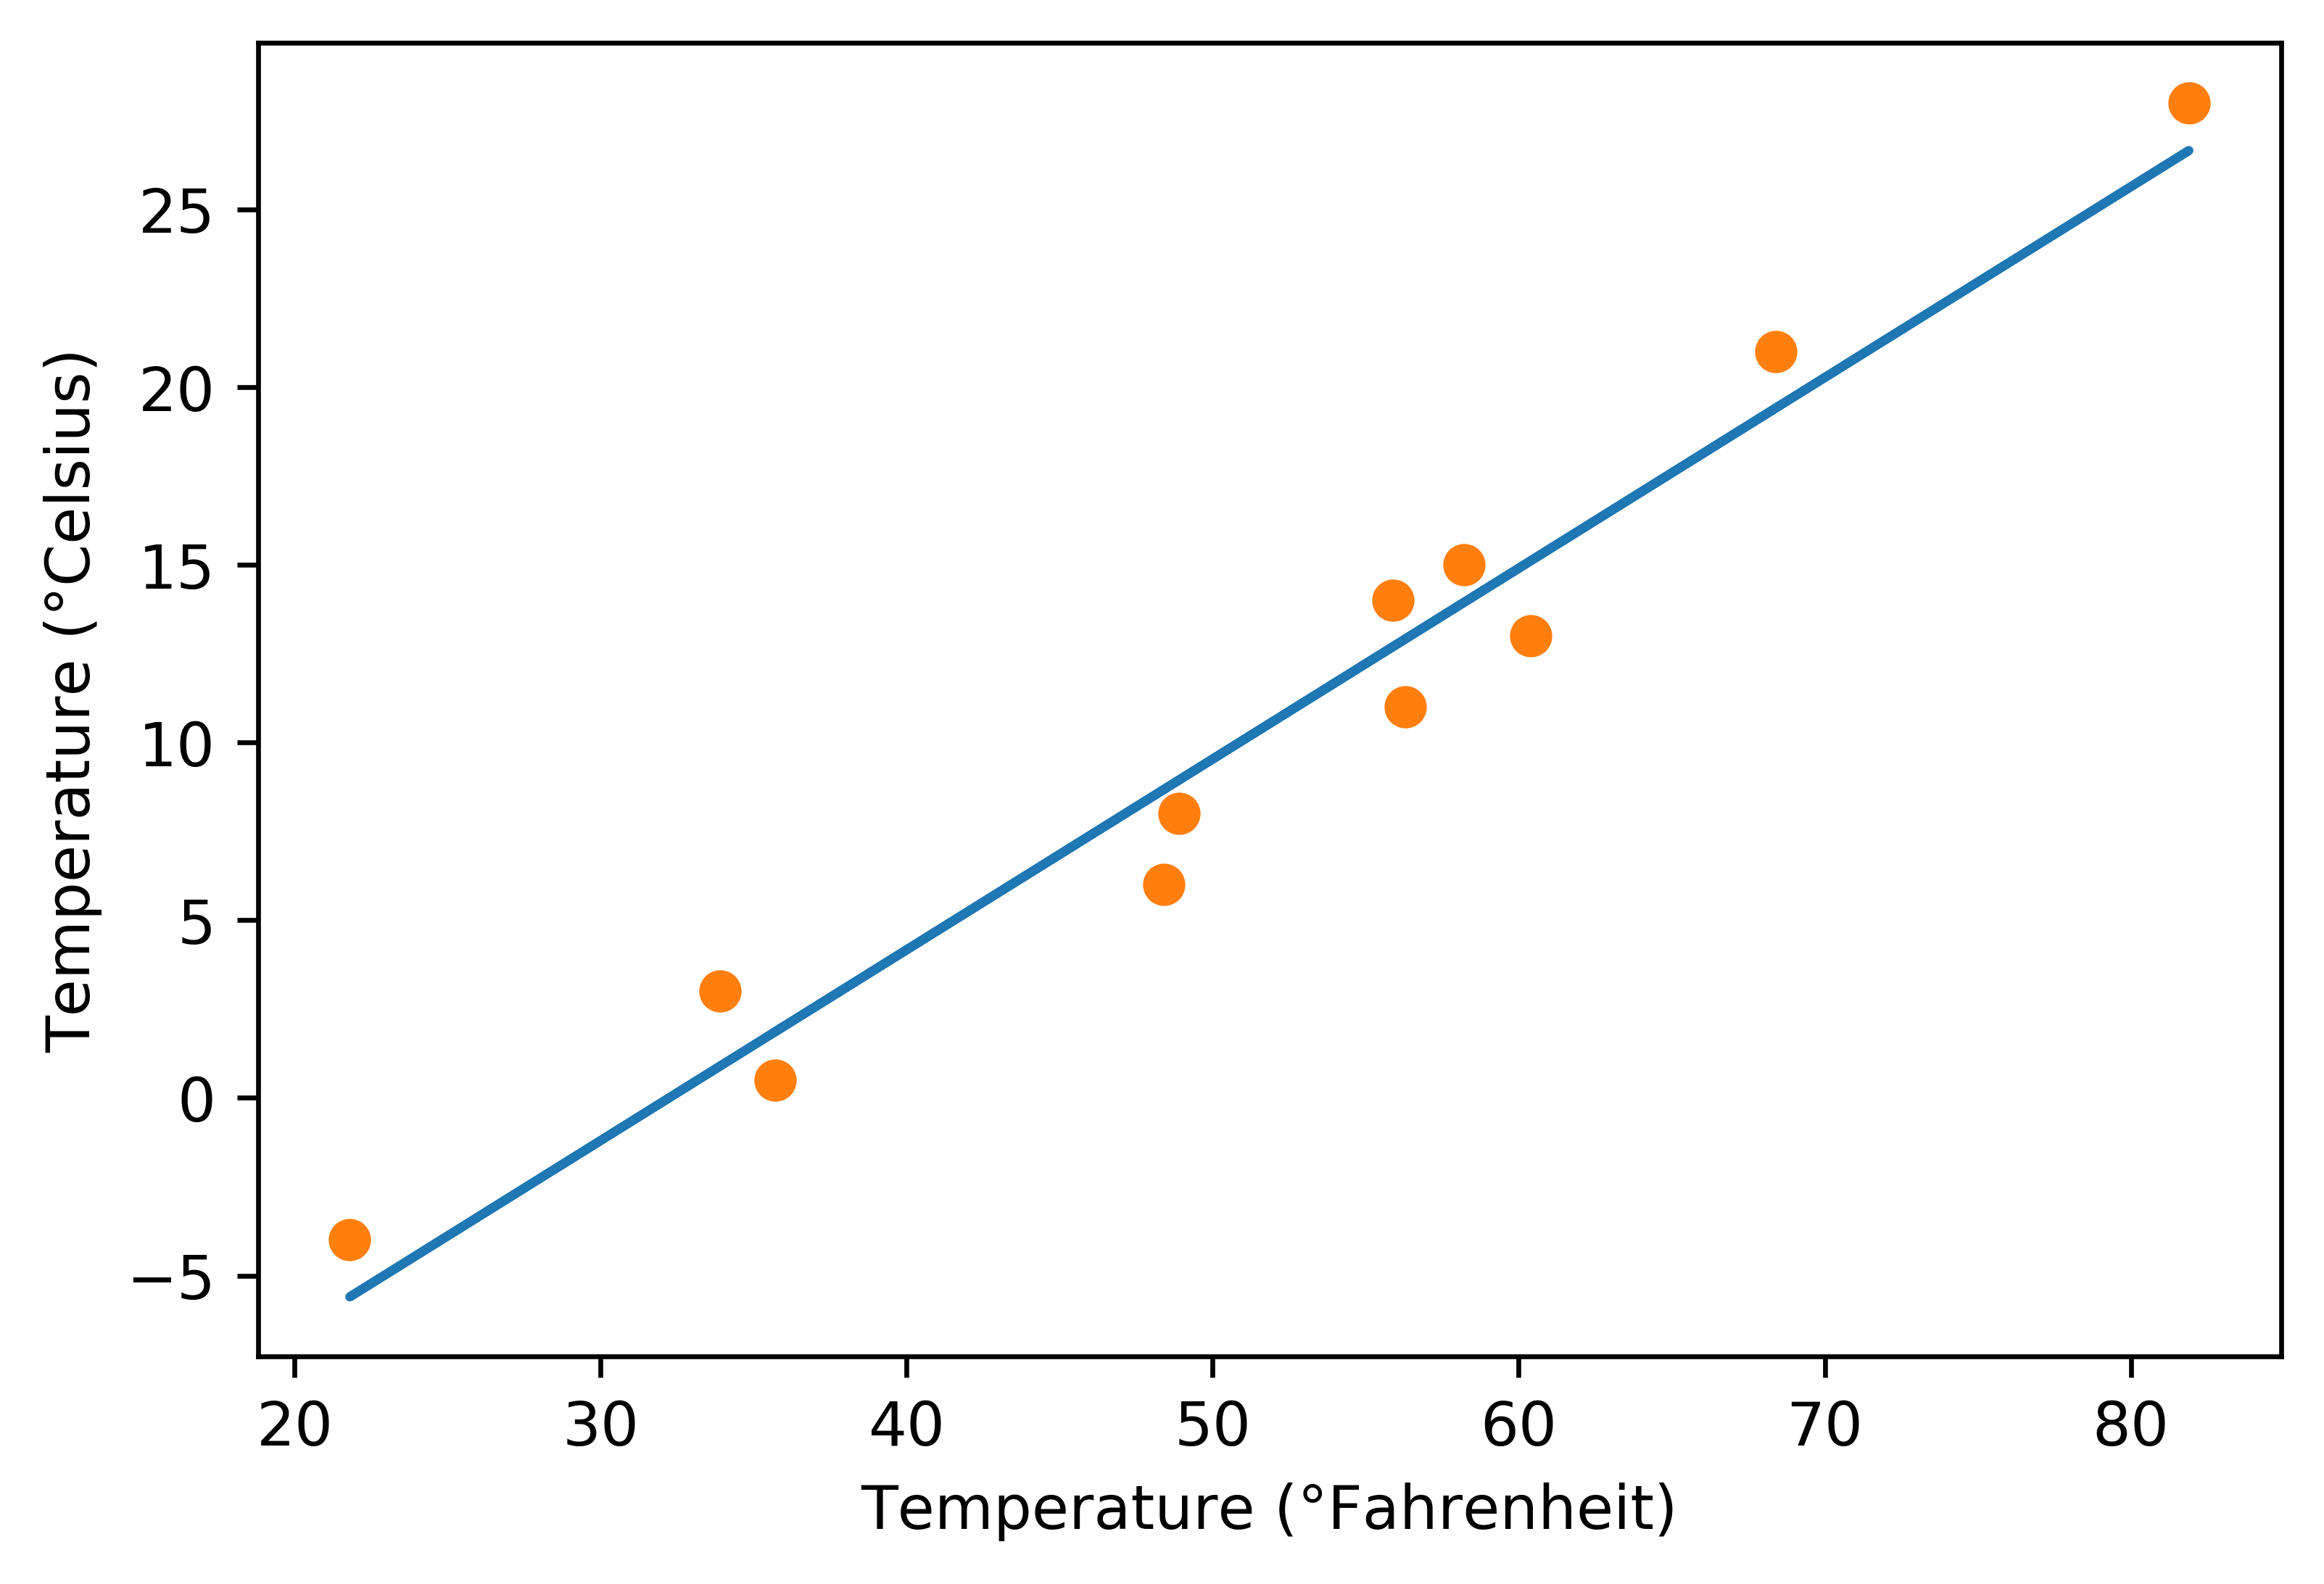

In [28]:
%matplotlib inline
from matplotlib import pyplot as plt

t_p = model(t_fn, *params)  
# Besides the original training data, we will plot prediction `t_p` for every input `t_f`
fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_f.numpy(), t_p.detach().numpy()) # cannot call numpy() directly, need detach()
plt.plot(t_f.numpy(), t_c.numpy(), 'o')
plt.savefig("temp_unknown_plot.png", format="png")  # bookskip

### Creating training and validation subsets

We operate with a tiny training set. Still as an illustration of a more geral technique we will break it into training and validation subset.  We will do it by shuffling `t_f` and `t_c` in the same way, and then splitting the resulting shuffled tensors in two parts.

Shuffling the elements of a tensor amounts to finding a permutation of its indices. The `randperm` function does exactly this:

In [29]:
n_samples = t_f.shape[0]
n_val = int(0.2 * n_samples)   # 20% of data is reserved for the validation set

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

print(train_indices, val_indices )

tensor([0, 1, 3, 9, 4, 8, 2, 5, 6]) tensor([10,  7])


Note that `train_indices` and `val_indices` are index tensors. When passed to the original `t_f` and `t_c` tensors they produce non-overlaping sets of training and validation data. Notice that the same index, i.e. `train_indeces` is applied to `t_f` and `t_c` to generate `train_t_f` and `train_t_c` data.

Simlarely the same index tensor `val_indices` is passed to `t_f` and `t_c` to generate validation data. 

In [30]:
train_t_f = t_f[train_indices]
train_t_c = t_c[train_indices]

val_t_f = t_f[val_indices]
val_t_c = t_c[val_indices]

# We normalize both training and validation data
train_t_fn = 0.1 * train_t_f
val_t_fn = 0.1 * val_t_f

####  The Training Loop with training and validation data

The training loop built to accept models and perform additionl calculation of loss on the validation data for every epoch now reads:

In [31]:
def training_loop(n_epochs, optimizer, params, train_t_f, val_t_f, train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_f, *params) # passing model instead of individual parameters
        train_loss = loss_fn(train_t_p, train_t_c)
                             
        val_t_p = model(val_t_f, *params) # 
        val_loss = loss_fn(val_t_p, val_t_c)
        
        optimizer.zero_grad()
        train_loss.backward() # The loss function is also passed in
        optimizer.step()

        if epoch <= 3 or epoch % 500 == 0:
            print('Epoch {}, Training loss {}, Validation loss {}'.format(
                epoch, float(train_loss), float(val_loss)))
            
    return params

### Note:
There is no `val_loss.backward()` call. Model is trained only on training data. 

In [32]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)
params = training_loop(
    n_epochs = 3000,
    optimizer = optimizer,
    params = params,
    train_t_f = train_t_fn,
    val_t_f = val_t_fn,
    train_t_c = train_t_c,
    val_t_c = val_t_c)

Epoch 1, Training loss 71.70108032226562, Validation loss 119.3489990234375
Epoch 2, Training loss 30.705936431884766, Validation loss 70.60588073730469
Epoch 3, Training loss 24.842201232910156, Validation loss 60.344200134277344
Epoch 500, Training loss 9.423933982849121, Validation loss 15.383718490600586
Epoch 1000, Training loss 4.885207176208496, Validation loss 4.876687049865723
Epoch 1500, Training loss 3.47463059425354, Validation loss 2.937596559524536
Epoch 2000, Training loss 3.036242961883545, Validation loss 3.0743725299835205
Epoch 2500, Training loss 2.8999948501586914, Validation loss 3.5290865898132324
Epoch 3000, Training loss 2.8576500415802, Validation loss 3.9002249240875244


Here we are not being entirely fair to our model. The validation set is really small, so the
validation loss will only be meaningful up to a point. In any case we note that the validation loss
is higher than our training loss, although not by an order of magnitude. That a model performs
better on the training set is expected, since the model parametes are being shaped by the training
set. Our main goal is to also see both the training loss and the validation loss decreasing. While
ideally both losses would be rougly the same value, as long as validation loss stays reasonably
close to the training loss, we know that our model is continuing to learn generalized things about
our data.

Also, just by looking at values of the validation loss we see that after 1000 epochs it starts to raise. Normally such behavior suggest overfitting.

Just for the fun of it let us generate our cloud and the line graph:

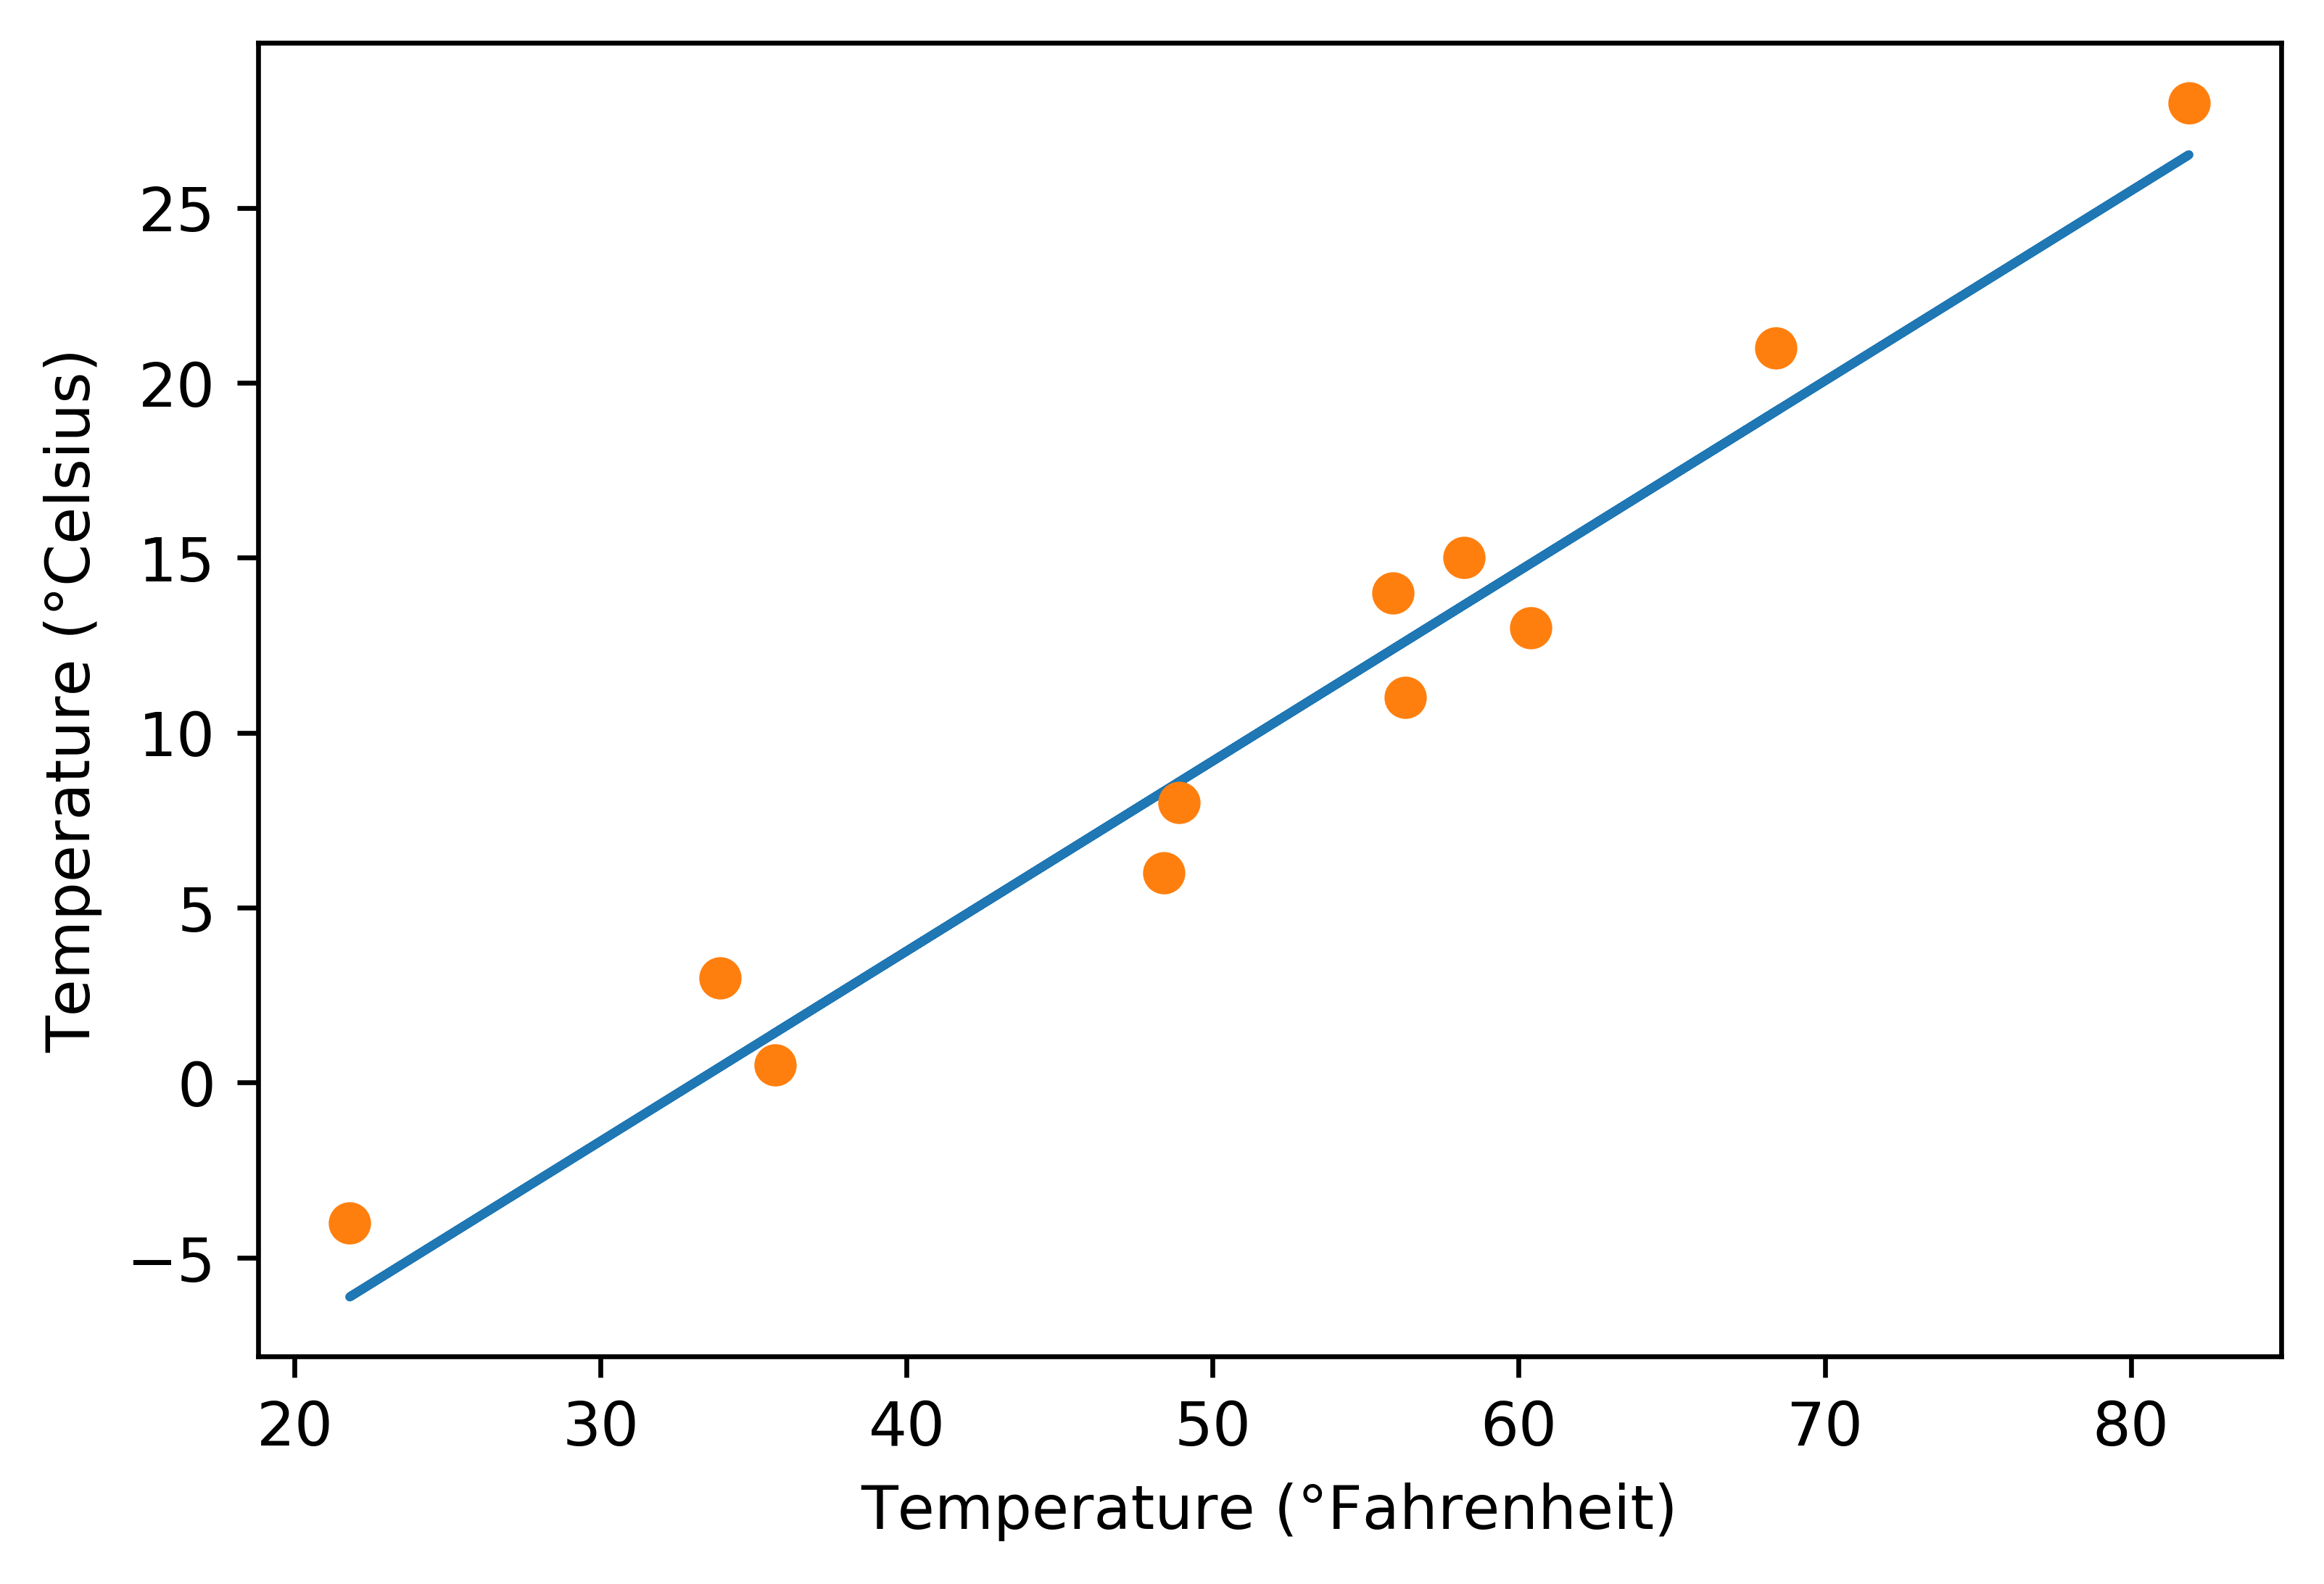

In [33]:
%matplotlib inline
from matplotlib import pyplot as plt

t_p = model(t_fn, *params)  
# Besides the original training data, we will plot prediction `t_p` for every input `t_f`
fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_f.numpy(), t_p.detach().numpy()) # cannot call numpy() directly, need detach()
plt.plot(t_f.numpy(), t_c.numpy(), 'o')
plt.savefig("temp_unknown_plot.png", format="png")  # bookskip